In [ ]:
#stride-step
#m-filter
#colab-mount
#train-/content/drive/MyDrive/CLOUD_DS/train
#test-/content/drive/MyDrive/CLOUD_DS/train
#val-/content/drive/MyDrive/CLOUD_DS/validation
#batch size=group of photo
#class name=folder name
#augumentation-data mai kuch kuch changes karna 

In [ ]:
import os 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_dir='/content/drive/MyDrive/CLOUD_DS/train'
val_dir='/content/drive/MyDrive/CLOUD_DS/validation'
test_dir='/content/drive/MyDrive/CLOUD_DS/test'

In [ ]:
BATCH_SIZE=8
IMG_SIZE=(128,128)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 120 files belonging to 3 classes.
Found 20 files belonging to 3 classes.
Found 28 files belonging to 3 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandi', 'rose']


(8, 128, 128, 3)
(8,)
tf.Tensor([2 1 1 2 1 2 0 0], shape=(8,), dtype=int32)


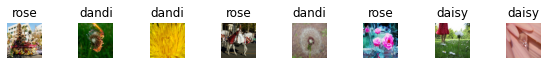

In [ ]:
# a single batch
# visulize
plt.figure(figsize=(10,6))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(BATCH_SIZE):
        plt.subplot(8,8,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
img=[]
label=[]
for image_batch,label_batch in train_ds:
  img.append(image_batch)
  label.append(label_batch)
inputs=np.concatenate(img)
targets=np.concatenate(label)
print(inputs.shape)
print(targets.shape)  

(120, 128, 128, 3)
(120,)


In [ ]:
train_batches=tf.data.experimental.cardinality(train_ds)
print('Train Batch=',train_batches.numpy())

Train Batch= 15


In [ ]:
IMG_HEIGHT=128
IMG_WIDTH=128
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                            input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(3,"softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [ ]:
#multi-class
#in regression,loss=mse
#optimizer are 3 can use any
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=8, verbose=1)

Epoch 1/10
15/15 [==============================] - 6s 351ms/step - loss: 3.9370 - accuracy: 0.3500 - val_loss: 1.1748 - val_accuracy: 0.3000
Epoch 2/10
15/15 [==============================] - 3s 174ms/step - loss: 0.9915 - accuracy: 0.5083 - val_loss: 1.0855 - val_accuracy: 0.3500
Epoch 3/10
15/15 [==============================] - 3s 176ms/step - loss: 0.8891 - accuracy: 0.6167 - val_loss: 1.0333 - val_accuracy: 0.5000
Epoch 4/10
15/15 [==============================] - 3s 171ms/step - loss: 0.9018 - accuracy: 0.6083 - val_loss: 1.0493 - val_accuracy: 0.5000
Epoch 5/10
15/15 [==============================] - 3s 172ms/step - loss: 0.6869 - accuracy: 0.7500 - val_loss: 1.0304 - val_accuracy: 0.5000
Epoch 6/10
15/15 [==============================] - 3s 172ms/step - loss: 0.5699 - accuracy: 0.7750 - val_loss: 0.9643 - val_accuracy: 0.5000
Epoch 7/10
15/15 [==============================] - 3s 174ms/step - loss: 0.3710 - accuracy: 0.8750 - val_loss: 0.9256 - val_accuracy: 0.6000
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_ds)

4/4 [==============================] - 0s 38ms/step - loss: 1.0538 - accuracy: 0.5000


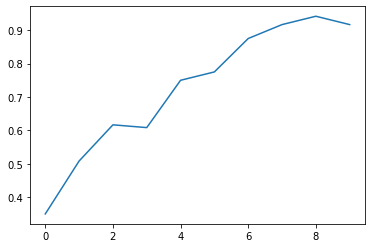

In [ ]:
d=hist.history
d.keys()
plt.plot(range(10),d['accuracy'])

In [ ]:
accuracy

0.5

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

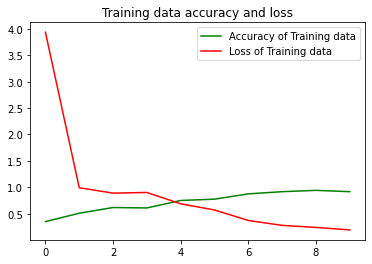

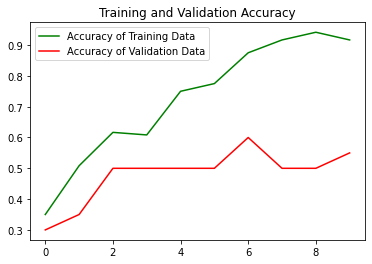

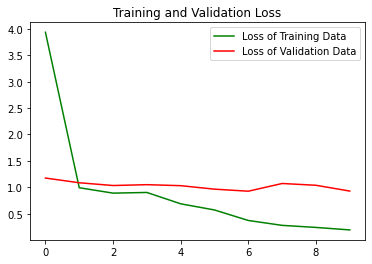

<Figure size 432x288 with 0 Axes>

In [ ]:
#not to be done
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
y_pred=model.predict(test_ds)
y_pred

array([[0.97332495, 0.02495481, 0.00172021],
       [0.28507435, 0.39809287, 0.31683278],
       [0.09742928, 0.5743348 , 0.32823586],
       [0.11544332, 0.07298902, 0.8115677 ],
       [0.5840482 , 0.23509102, 0.18086073],
       [0.31168073, 0.44445828, 0.24386092],
       [0.43748096, 0.24149944, 0.32101962],
       [0.2838801 , 0.45914245, 0.2569775 ],
       [0.26567972, 0.4952344 , 0.23908591],
       [0.07390255, 0.8924281 , 0.0336694 ],
       [0.08154726, 0.88939375, 0.02905899],
       [0.32660997, 0.28588367, 0.38750634],
       [0.24430448, 0.43813485, 0.31756064],
       [0.05113685, 0.8656705 , 0.08319262],
       [0.17216398, 0.5068654 , 0.32097068],
       [0.17575286, 0.7995299 , 0.02471724],
       [0.25405923, 0.51786864, 0.2280721 ],
       [0.08997899, 0.9001247 , 0.00989629],
       [0.03213183, 0.9659014 , 0.00196674],
       [0.05434999, 0.8410648 , 0.10458519],
       [0.10102785, 0.6913978 , 0.20757441],
       [0.75436336, 0.20368934, 0.04194728],
       [0.

In [ ]:
score=tf.nn.softmax(y_pred)
score

<tf.Tensor: shape=(28, 3), dtype=float32, numpy=
array([[0.56630045, 0.21936886, 0.21433067],
       [0.31726685, 0.3552287 , 0.32750446],
       [0.25835142, 0.41622514, 0.32542348],
       [0.25224513, 0.24176039, 0.5059945 ],
       [0.4212992 , 0.2971943 , 0.28150654],
       [0.32505265, 0.37120882, 0.3037386 ],
       [0.36871907, 0.3030972 , 0.32818377],
       [0.31595427, 0.37647808, 0.3075676 ],
       [0.30942544, 0.38926944, 0.3013051 ],
       [0.23653412, 0.5362594 , 0.22720651],
       [0.23855317, 0.535092  , 0.22635485],
       [0.3308103 , 0.31760827, 0.35158148],
       [0.30396095, 0.36897525, 0.32706383],
       [0.23306233, 0.52628326, 0.24065436],
       [0.281059  , 0.39278644, 0.32615456],
       [0.26840022, 0.50082475, 0.23077507],
       [0.30522907, 0.39737165, 0.29739922],
       [0.23973483, 0.53898036, 0.22128482],
       [0.22151503, 0.5635522 , 0.21493277],
       [0.23542218, 0.5170271 , 0.24755074],
       [0.25529185, 0.46071392, 0.28399426],
      

In [ ]:
y_p=np.argmax(score,axis=1)
y_p

array([0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 2, 1, 1])

In [ ]:
img=[]
label=[]
for image_batch,label_batch in test_ds:
  img.append(image_batch)
  label.append(label_batch)
Timage=np.concatenate(img)
Tlabel=np.concatenate(label)
print(inputs.shape)
print(targets.shape)  

(120, 128, 128, 3)
(120,)


In [ ]:
final_y_pred=class_names[y_p[1]]  
final_y_pred

'dandi'

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Tlabel,y_p)
cm

array([[2, 9, 1],
       [1, 6, 1],
       [1, 5, 2]])

(128, 128, 3)


Text(0.5, 1.0, 'rose')

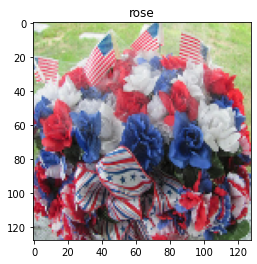

In [ ]:
i=24
im=Timage[i]
L=Tlabel[i]
print(im.shape)
plt.imshow(im/255)
plt.title(class_names[L])

In [ ]:
print(im.shape)
im1=tf.expand_dims(im,axis=0)
print(im1.shape)
p=model.predict(im1)
p
print("prob",np.max(p[0]))
print('label',np.argmax(p[0]))
print('class',class_names[np.argmax(p[0])])

(128, 128, 3)
(1, 128, 128, 3)
prob 0.51786834
label 1
class dandi


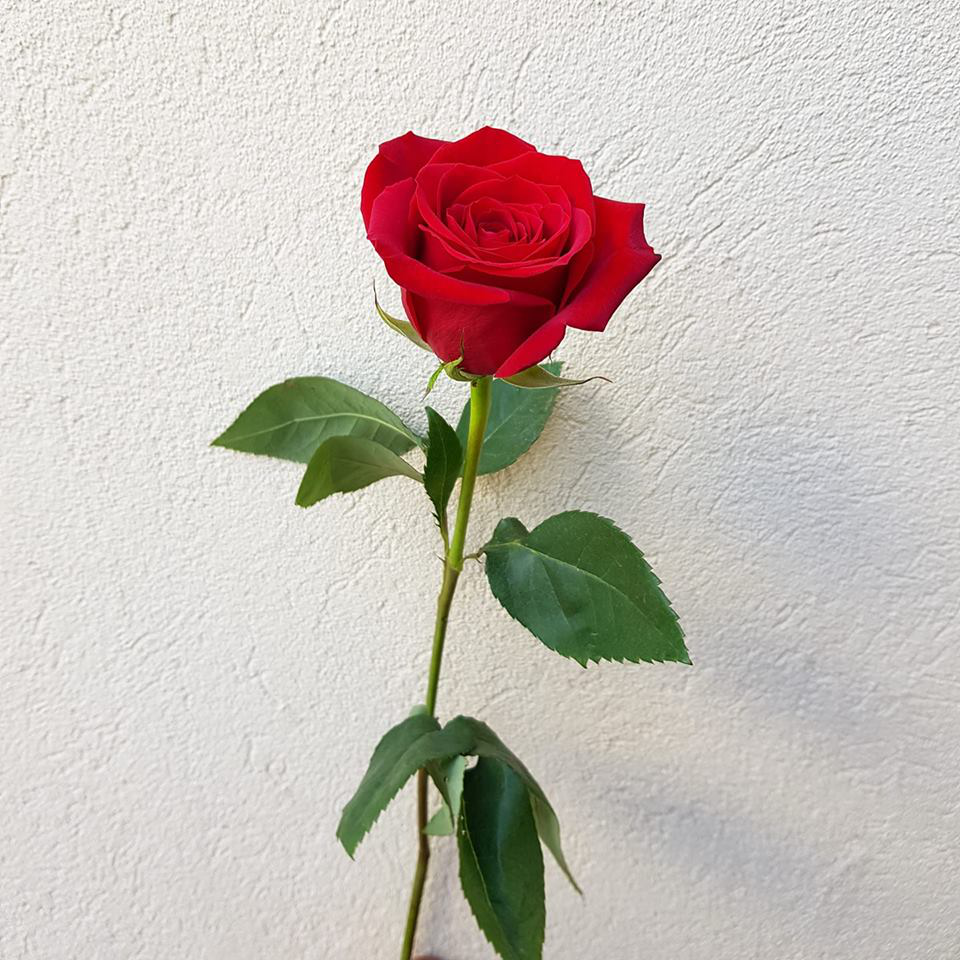

In [ ]:
#pil-python image library
#url='https://meerutonlinecakes.co.in/wp-content/uploads/2020/06/single-rose.jpg'
#import cv2
#img=cv2.imread(url)
#print(img.shape)
import PIL
dir='/content/drive/MyDrive/CLOUD_DS/single-rose.jpg'
PIL.Image.open(dir)


(960, 960, 3)


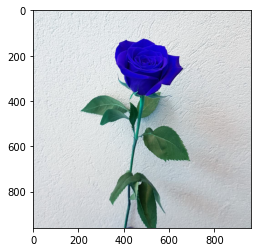

In [ ]:
#method 2
import cv2 
dir="/content/drive/MyDrive/CLOUD_DS/single-rose.jpg"
img=cv2.imread(dir)
print(img.shape)
import matplotlib.pyplot as plt 
plt.imshow(img)

[[[0.88235295 0.8666667  0.85490197]
  [1.         1.         0.972549  ]
  [0.9254902  0.9137255  0.89411765]
  ...
  [0.75686276 0.7529412  0.74509805]
  [0.9411765  0.9372549  0.92941177]
  [0.8156863  0.8117647  0.8039216 ]]

 [[0.92156863 0.90588236 0.89411765]
  [0.99215686 0.98039216 0.9529412 ]
  [0.80784315 0.79607844 0.7764706 ]
  ...
  [0.77254903 0.76862746 0.7607843 ]
  [0.8392157  0.8352941  0.827451  ]
  [1.         0.99607843 0.9882353 ]]

 [[0.96862745 0.95686275 0.9372549 ]
  [0.9254902  0.9137255  0.89411765]
  [0.93333334 0.92156863 0.9019608 ]
  ...
  [0.92156863 0.91764706 0.9098039 ]
  [0.92941177 0.9254902  0.91764706]
  [0.8666667  0.8627451  0.85490197]]

 ...

 [[0.8745098  0.85882354 0.85490197]
  [0.84313726 0.827451   0.8235294 ]
  [0.85882354 0.84313726 0.83137256]
  ...
  [0.7372549  0.7254902  0.7058824 ]
  [0.79607844 0.78431374 0.7647059 ]
  [0.7254902  0.7137255  0.69411767]]

 [[0.827451   0.8117647  0.8       ]
  [0.8745098  0.85882354 0.84705883]


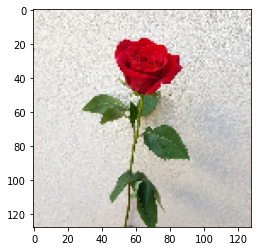

In [ ]:
#method3
import tensorflow as tf
dir="/content/drive/MyDrive/CLOUD_DS/single-rose.jpg"
img=tf.keras.preprocessing.image.load_img(dir,target_size=(128,128))
img=tf.keras.preprocessing.image.img_to_array(img)
img=img/255.0
print(img)
plt.imshow(img)
print(img.shape)

In [ ]:
im1=tf.expand_dims(img,axis=0)
print(im1.shape)
p=model.predict(im1)
p
print("prob",np.max(p[0]))
print('label',np.argmax(p[0]))
print('class',class_names[np.argmax(p[0])])

(1, 128, 128, 3)
prob 0.36848506
label 1
class dandi


In [ ]:
################main code till here
#####rest extra

In [ ]:
class_names

['daisy', 'dandi', 'rose']

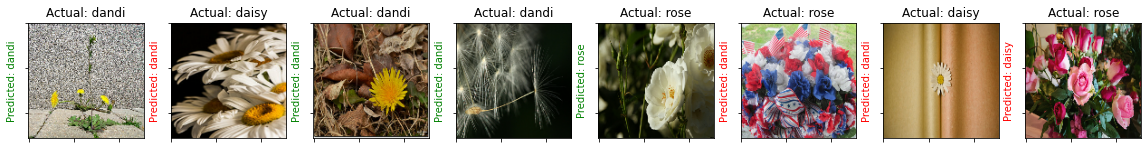

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(8):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
#plt.figure(figsize=(20, 20))
p=[]
t=[]
for images, labels in test_ds.take(1):
    for i in range(8):
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        p.append(np.argmax(score))
        t.append(labels[i])

In [ ]:
#plt.figure(figsize=(20, 20))
p=[]
t=[]
for images, labels in test_ds:
    
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(images)
        score = np.argmax(tf.nn.softmax(predictions),axis=1)
        p.append(score)
        t.append(labels)

In [ ]:
p1=np.concatenate(p)
t1=np.concatenate(t)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(t1,p1)
cm

array([[3, 8, 1],
       [0, 8, 0],
       [1, 4, 3]])

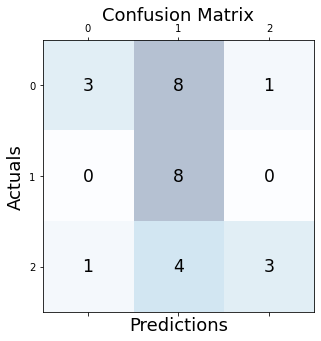

In [ ]:
conf_matrix=cm
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
z=(p1!=t1).sum()
z

14

In [ ]:
p1!=t1

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
        True])

In [ ]:
model.save('my_model')

In [ ]:
#plt.figure(figsize=(20, 20))
p_train=[]
t_train=[]
for images, labels in train_ds:
    
        #ax = plt.subplot(8, 8, i + 1)
        #plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(images)
        score = np.argmax(tf.nn.softmax(predictions),axis=1)
        p_train.append(score)
        t_train.append(labels)